In [1]:
import re
import gzip
import json
import time
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from termcolor import colored




pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')


grocery_df=getDF("./reviews_Grocery_and_Gourmet_Food_5.json.gz")
office_df=getDF("./reviews_Office_Products_5.json.gz")
beauty_df=getDF("./reviews_Beauty_5.json.gz")
toy_df=getDF("./reviews_Toys_and_Games_5.json.gz")
pet_df=getDF("./reviews_Pet_Supplies_5.json.gz")

In [3]:
grocery_df.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste is unique and a bit different. The only thing that is bothersome is the price. I thought it was a bit expensive....,4.0,Good Taste,1370044800,"06 1, 2013"
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]","I bought this on impulse and it comes from Japan, which amused my family, all those weird stamps and markings on the package. So that was fun. It said it would take about a month to arrive and it did take that long. I was hoping for a more interesting taste but to our family, it just tasted a bit less flavorful or weaker than the standard milk chocolate kit kat. The green tea flavor was too subtle for the sugar and it just tasted sweet. The wafers were very crispy, and that was good, but it tasted a bit anemic to us.I'm happy I bought it, but don't need to buy it again.",3.0,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014"


In [4]:
grocery_df=grocery_df[["reviewText","overall"]]
grocery_df["category"]="food"
# print(grocery_df.head(1))

office_df=office_df[["reviewText","overall"]]
office_df["category"]="office"

# print(office_df.head(1))

beauty_df=beauty_df[["reviewText","overall"]]
beauty_df["category"]="beauty"

# print(beauty_df.head(1))

toy_df=toy_df[["reviewText","overall"]]
toy_df["category"]="games"
# print(toy_df.head(1))


pet_df=pet_df[["reviewText","overall"]]
pet_df["category"]="petsupplies"

In [5]:
grocery_df.iloc[0]

reviewText    Just another flavor of Kit Kat but the taste is unique and a bit different.  The only thing that is bothersome is the price.  I thought it was a bit expensive....
overall       4                                                                                                                                                                 
category      food                                                                                                                                                              
Name: 0, dtype: object

In [6]:
data=pd.concat([grocery_df,office_df,beauty_df,toy_df,pet_df])

In [7]:
data.head(2)

,reviewText,overall,category
0,Just another flavor of Kit Kat but the taste is unique and a bit different. The only thing that is bothersome is the price. I thought it was a bit expensive....,4.0,food
1,"I bought this on impulse and it comes from Japan, which amused my family, all those weird stamps and markings on the package. So that was fun. It said it would take about a month to arrive and it did take that long. I was hoping for a more interesting taste but to our family, it just tasted a bit less flavorful or weaker than the standard milk chocolate kit kat. The green tea flavor was too subtle for the sugar and it just tasted sweet. The wafers were very crispy, and that was good, but it tasted a bit anemic to us.I'm happy I bought it, but don't need to buy it again.",3.0,food


In [8]:
data["category"].dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [9]:
data.head(2)

,reviewText,overall,category
0,Just another flavor of Kit Kat but the taste is unique and a bit different. The only thing that is bothersome is the price. I thought it was a bit expensive....,4.0,food
1,"I bought this on impulse and it comes from Japan, which amused my family, all those weird stamps and markings on the package. So that was fun. It said it would take about a month to arrive and it did take that long. I was hoping for a more interesting taste but to our family, it just tasted a bit less flavorful or weaker than the standard milk chocolate kit kat. The green tea flavor was too subtle for the sugar and it just tasted sweet. The wafers were very crispy, and that was good, but it tasted a bit anemic to us.I'm happy I bought it, but don't need to buy it again.",3.0,food


In [10]:
data=data.groupby("category").head(10000)

In [11]:
data["category"].value_counts()

food           10000
office         10000
petsupplies    10000
games          10000
beauty         10000
Name: category, dtype: int64

In [12]:
len(data)

50000

# Data Cleaning

In [13]:
import string
from nltk.tokenize import word_tokenize as tokenize
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

In [14]:
def clean(text):
    text=text.lower()
    url_removed=re.sub(r'https\S+','',text,flags=re.MULTILINE)
    text=re.sub("[^a-zA-Z]"," ",url_removed)
    text=re.sub("\.+"," ",text)
    word_tokens=tokenize(text)
    text=[word for word in word_tokens if word  not in stop_words]
    text=[word for word in text if word not in string.punctuation]
    return " ".join(text)

In [15]:
clean("This is  good day . ! ! , I IS  #")

'good day'

In [16]:
check=data["reviewText"].iloc[0]

In [17]:
print("original sentence \n",check)


original sentence 
 Just another flavor of Kit Kat but the taste is unique and a bit different.  The only thing that is bothersome is the price.  I thought it was a bit expensive....


In [18]:
print("cleaned sentence:\n",clean(check))

cleaned sentence:
 another flavor kit kat taste unique bit different thing bothersome price thought bit expensive


In [19]:
data["cleaned_text"]=data["reviewText"].apply(lambda x:clean(x))

In [20]:
category_labels={"petsupplies":0,"beauty":1,"games":2,"food":3,"office":4}
data["label"]=data["category"].map(category_labels)



In [21]:
data["category"].value_counts()

food           10000
office         10000
petsupplies    10000
games          10000
beauty         10000
Name: category, dtype: int64

In [22]:
data.dropna(inplace=True)

In [23]:
data["category"].value_counts()

food           10000
office         10000
petsupplies    10000
games          10000
beauty         10000
Name: category, dtype: int64

In [24]:
data["label"]=data["label"].astype(int)

In [25]:
data.head(2)

,reviewText,overall,category,cleaned_text,label
0,Just another flavor of Kit Kat but the taste is unique and a bit different. The only thing that is bothersome is the price. I thought it was a bit expensive....,4.0,food,another flavor kit kat taste unique bit different thing bothersome price thought bit expensive,3
1,"I bought this on impulse and it comes from Japan, which amused my family, all those weird stamps and markings on the package. So that was fun. It said it would take about a month to arrive and it did take that long. I was hoping for a more interesting taste but to our family, it just tasted a bit less flavorful or weaker than the standard milk chocolate kit kat. The green tea flavor was too subtle for the sugar and it just tasted sweet. The wafers were very crispy, and that was good, but it tasted a bit anemic to us.I'm happy I bought it, but don't need to buy it again.",3.0,food,bought impulse comes japan amused family weird stamps markings package fun said would take month arrive take long hoping interesting taste family tasted bit less flavorful weaker standard milk chocolate kit kat green tea flavor subtle sugar tasted sweet wafers crispy good tasted bit anemic us happy bought need buy,3


In [26]:
data["label"].value_counts()

4    10000
3    10000
2    10000
1    10000
0    10000
Name: label, dtype: int64

In [27]:
train_samples_class_0=data[data["label"]==0][:9000]
train_samples_class_1=data[data["label"]==1][:9000]
train_samples_class_2=data[data["label"]==2][:9000]
train_samples_class_3=data[data["label"]==3][:9000]
train_samples_class_4=data[data["label"]==4][:9000]




In [28]:
train=pd.concat([train_samples_class_0,train_samples_class_1,train_samples_class_2,train_samples_class_3,train_samples_class_4])

In [29]:
len(train)

45000

In [30]:
train=train.sample(frac=1.0)

In [31]:
test_samples_class_0=data[data["label"]==0][9000:]
test_samples_class_1=data[data["label"]==1][9000:]
test_samples_class_2=data[data["label"]==2][9000:]
test_samples_class_3=data[data["label"]==3][9000:]
test_samples_class_4=data[data["label"]==4][9000:]


In [32]:
test=pd.concat([test_samples_class_0,test_samples_class_1,test_samples_class_2,test_samples_class_3,test_samples_class_4])

In [33]:
test=test.sample(frac=1.0)

In [34]:
print("length of train",len(train))
print("length of test",len(test))

length of train 45000
length of test 5000


In [35]:
train.head(2)

,reviewText,overall,category,cleaned_text,label
176,"I love D&D Ravenloft. My favorite character was Lord Soth, the Knight of the Black Rose. Well, he isn't in this game. It's a different story. Many other reviews already posted most key features and fun of this game. The key point for me to say being many years D&D player, I still want to join the group, but time is the key concern after getting old with busy job. This is the one of the good solution for me to enjoy quick D&D. It combines both D&D RPG and D&D Miniature games with simple character and monster card plus miniatures and you can play as 1 player up to 5 players. Yes, 1 players. That's the key for me to join the advanture alone or in group with different fun and good time. Nice game.",5.0,games,love ravenloft favorite character lord soth knight black rose well game different story many reviews already posted key features fun game key point say many years player still want join group time key concern getting old busy job one good solution enjoy quick combines rpg miniature games simple character monster card plus miniatures play player players yes players key join advanture alone group different fun good time nice game,2
8423,"This is a bit too complicated for my 10 yr old daughter, but I bet next year it will be great.",2.0,games,bit complicated yr old daughter bet next year great,2


In [36]:
test.head(2)

,reviewText,overall,category,cleaned_text,label
9960,"I got this originally for one of our cats that prefers a comb rather than brush, but it didn't work on her so well. It works great on our little shihtzu though so I am totally happy with it. I used the wide end and it went through his fine hair with ease and did a fantastic job. The search is still on for a good cat comb I guess.",5.0,petsupplies,got originally one cats prefers comb rather brush work well works great little shihtzu though totally happy used wide end went fine hair ease fantastic job search still good cat comb guess,0
9508,"This 15 Puzzle is one of the all time most popular puzzles--right up there with Rubik's Cube.I have loved puzzles of all kinds ever since I was a kid,over 70 years ago.The 15 Puzzle was probably my first puzzle and it has always challenged ,entertained and fascinated me .I have had many,many versions of it over the years.This one by Binary Arts/ThinkFun is one of my favorites for several reasons.It is extremely well made of metal,the tiles slide exceptionally well and do not fall out,and it is quite small,2 1/2"" X 2 1/2"" X 1/4"",and comes with a leatherette carrying case and even a tiny 14 page pamphlet that has a bit of information on the puzzle and 40 problems to solve.This pamphlet also fits in the carrying case.If you are interested in more information on this puzzle,I strongly suggest you get The 15 Puzzle Book"" by Jerry Slocum and Dic Sonneveld and/or ""The Famous 15 Puzzle"" a beautiful boxed set including a magnificent wooden puzzle and a book about the puzzle and the world wide craze it created in 1880,also by Slocum and Sonneveld.These two books are filled with all kinds of information,history,illustrations and details on solving various problems and arrangements.I have reviewed both of them.",5.0,games,puzzle one time popular puzzles right rubik cube loved puzzles kinds ever since kid years ago puzzle probably first puzzle always challenged entertained fascinated many many versions years one binary arts thinkfun one favorites several reasons extremely well made metal tiles slide exceptionally well fall quite small x x comes leatherette carrying case even tiny page pamphlet bit information puzzle problems solve pamphlet also fits carrying case interested information puzzle strongly suggest get puzzle book jerry slocum dic sonneveld famous puzzle beautiful boxed set including magnificent wooden puzzle book puzzle world wide craze created also slocum sonneveld two books filled kinds information history illustrations details solving various problems arrangements reviewed,2


In [37]:
X_train=np.array(train["cleaned_text"])
X_test=np.array(test["cleaned_text"])
y_train=np.array(train["label"])
y_test=np.array(test["label"])

In [38]:
X_train[0]

'love ravenloft favorite character lord soth knight black rose well game different story many reviews already posted key features fun game key point say many years player still want join group time key concern getting old busy job one good solution enjoy quick combines rpg miniature games simple character monster card plus miniatures play player players yes players key join advanture alone group different fun good time nice game'

In [39]:
y_train[0]

2

# Data Preprocessing

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential

### Tokenizer

In [41]:
tokenizer=Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

word_index=tokenizer.word_index

In [42]:
dict(list(word_index.items())[0:20])

{'<OOV>': 1,
 'like': 2,
 'one': 3,
 'use': 4,
 'great': 5,
 'good': 6,
 'product': 7,
 'get': 8,
 'game': 9,
 'would': 10,
 'well': 11,
 'really': 12,
 'time': 13,
 'love': 14,
 'also': 15,
 'much': 16,
 'little': 17,
 'used': 18,
 'skin': 19,
 'even': 20}

In [43]:
print(len(word_index))
vocab_size=len(word_index)+1
print(vocab_size)

45668
45669


In [44]:
data["len"]=data["cleaned_text"].apply(lambda x:len(x.split()))

(array([16622., 15255.,  7285.,  4022.,  2292.,  1378.,   954.,   634.,
          404.,   283.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <a list of 10 Patch objects>)

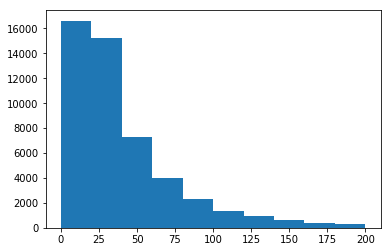

In [45]:
import matplotlib.pyplot as plt
plt.hist(data["len"],range=(0,200))

In [46]:
max_length=100
embedding_dim=300 # every word will have 300 values [0.....300]
trunc_type='post'
padding_type='post'


train_sequences=tokenizer.texts_to_sequences(X_train)
print(train_sequences[0])
print(len(train_sequences[0]))

[14, 5355, 169, 1620, 4041, 25963, 6292, 196, 1357, 11, 9, 93, 1137, 58, 206, 363, 2726, 1427, 1077, 48, 9, 1427, 262, 94, 58, 38, 378, 26, 68, 4169, 977, 13, 1427, 2134, 138, 24, 1564, 222, 3, 6, 1006, 204, 358, 6413, 5641, 2164, 158, 226, 1620, 1774, 192, 291, 2627, 30, 378, 241, 439, 241, 1427, 4169, 17752, 859, 977, 93, 48, 6, 13, 35, 9]
69


In [47]:
test_sequences=tokenizer.texts_to_sequences(X_test)
print(test_sequences[0])

[51, 1665, 3, 292, 2814, 1926, 345, 375, 41, 11, 42, 5, 17, 33945, 87, 768, 172, 18, 751, 199, 360, 116, 33, 1109, 773, 222, 1573, 26, 6, 205, 1926, 408]


In [48]:
vocab=dict(list(word_index.items()))

In [49]:
X_test[0]

'got originally one cats prefers comb rather brush work well works great little shihtzu though totally happy used wide end went fine hair ease fantastic job search still good cat comb guess'

In [50]:
explain='great shampoo conditioner two scotties hair '
embed='[0.2,0.4,0.6,....until 300] [0.2,0.333,0.07,....until 300]'

In [51]:
vocab.get('great')

5

In [52]:
vocab.get('shampoo')

496

### padding

In [53]:
train_padded=pad_sequences(train_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [54]:
print(train_padded[0])
print(len(train_padded[0]))
print(len(train_padded[1]))

[   14  5355   169  1620  4041 25963  6292   196  1357    11     9    93
  1137    58   206   363  2726  1427  1077    48     9  1427   262    94
    58    38   378    26    68  4169   977    13  1427  2134   138    24
  1564   222     3     6  1006   204   358  6413  5641  2164   158   226
  1620  1774   192   291  2627    30   378   241   439   241  1427  4169
 17752   859   977    93    48     6    13    35     9     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
100
100


In [55]:
test_padded=pad_sequences(test_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [56]:
print(test_padded[0])

[   51  1665     3   292  2814  1926   345   375    41    11    42     5
    17 33945    87   768   172    18   751   199   360   116    33  1109
   773   222  1573    26     6   205  1926   408     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


In [57]:
print(len(test_padded[0]))

100


In [58]:
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

In [59]:
reverse_word_index[5]

'great'

In [60]:
def decode_sentence(text):
    return " ".join([reverse_word_index.get(i,'?') for i in text])

In [61]:
decode_sentence(test_padded[0])

'got originally one cats prefers comb rather brush work well works great little shihtzu though totally happy used wide end went fine hair ease fantastic job search still good cat comb guess ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?'

In [62]:
X_test[0]

'got originally one cats prefers comb rather brush work well works great little shihtzu though totally happy used wide end went fine hair ease fantastic job search still good cat comb guess'

# Model Development

In [63]:
import tensorflow as tf

In [64]:
vocab_size

45669

In [65]:
lstm_model=tf.keras.Sequential([
    # Add an Embedding layer  which expects vocab size and embeding size  300
    tf.keras.layers.Embedding(vocab_size,embedding_dim), # creates word embedddings layer
    tf.keras.layers.LSTM(128),
#     tf.keras.layers.Dense(20,activation="relu")
    # units is nothing but number of hidden neurons in the lstm gates (forget,input,output)
    tf.keras.layers.Dense(5,activation='softmax')
    
])

In [66]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         13700700  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               219648    
_________________________________________________________________
dense (Dense)                (None, 5)                 645       
Total params: 13,920,993
Trainable params: 13,920,993
Non-trainable params: 0
_________________________________________________________________


In [67]:
category_labels

{'petsupplies': 0, 'beauty': 1, 'games': 2, 'food': 3, 'office': 4}

In [68]:
train_padded.shape

(45000, 100)

In [69]:
test_padded.shape

(5000, 100)

In [70]:
y_train.shape

(45000,)

In [71]:
y_test.shape

(5000,)

In [73]:
opt=tf.keras.optimizers.Adam(0.01)
lstm_model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
num_epochs=3
histoy=lstm_model.fit(train_padded,y_train,epochs=num_epochs,validation_data=(test_padded,y_test),verbose=2)

Epoch 1/3
1407/1407 - 259s - loss: 0.6849 - accuracy: 0.7076 - val_loss: 0.4063 - val_accuracy: 0.8680
Epoch 2/3
1407/1407 - 285s - loss: 0.2329 - accuracy: 0.9240 - val_loss: 0.4016 - val_accuracy: 0.8706
Epoch 3/3
1407/1407 - 317s - loss: 0.1925 - accuracy: 0.9380 - val_loss: 0.3986 - val_accuracy: 0.8774


In [74]:
txt={"tea real delight big fan white tea one best varieties tried flavor subtle overpowering get nice peach flavor sweet yet bitter still taste light flavor smooth white tea celestial seasonings imperial white peach white tea one favorite teas see going back time time really pleasant definitely recommend especially love white tea"}
seq=tokenizer.texts_to_sequences(txt)
padded=pad_sequences(seq,maxlen=max_length,padding=padding_type,truncating=trunc_type)
pred=lstm_model.predict(padded) # output [ 5 values  for each class and label number]
labels=list(category_labels.keys())

print(pred,labels[np.argmax(pred)])




[[3.6639222e-03 1.4842912e-03 4.9497797e-03 9.8985928e-01 4.2688243e-05]] food


In [75]:
category_labels

{'petsupplies': 0, 'beauty': 1, 'games': 2, 'food': 3, 'office': 4}

In [79]:
lstm_model.save("final_model.h5")

In [81]:
new_model = tf.keras.models.load_model('final_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         13700700  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               219648    
_________________________________________________________________
dense (Dense)                (None, 5)                 645       
Total params: 13,920,993
Trainable params: 13,920,993
Non-trainable params: 0
_________________________________________________________________


In [88]:
check1=lstm_model.predict(padded)
labels1=list(category_labels.keys())
print(check1,labels1[np.argmax(check1)])

[[3.6639222e-03 1.4842912e-03 4.9497797e-03 9.8985928e-01 4.2688243e-05]] food


In [94]:
txt={"I give this daily as a treat honey"}
seq=tokenizer.texts_to_sequences(txt)
padded=pad_sequences(seq,maxlen=max_length,padding=padding_type,truncating=trunc_type)
pred=lstm_model.predict(padded) # output [ 5 values  for each class and label number]
labels=list(category_labels.keys())

print(pred,labels[np.argmax(pred)])


check2=new_model.predict(padded)
labels2=list(category_labels.keys())
print(check2,labels2[np.argmax(check2)])

[[4.8271663e-02 1.1689210e-03 1.4854333e-03 9.4880652e-01 2.6745870e-04]] food
[[4.8271663e-02 1.1689210e-03 1.4854333e-03 9.4880652e-01 2.6745870e-04]] food


In [93]:
print(check2)

[[3.6639222e-03 1.4842912e-03 4.9497797e-03 9.8985928e-01 4.2688243e-05]]


In [91]:
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [76]:
float(9.8909444e-01)

0.98909444

In [77]:
float(8.0315201e-03)

0.0080315201

In [78]:
test.sample(1)

,reviewText,overall,category,cleaned_text,label
9359,I have a 55 gallon tank and the Aquarclear foam inserts works Great! I have had my tank for only 6 months and have never changed the insert. I do however take it out and rinse it in tank water that I have taken out for this purpose once a month. It is holding up great! Great Value!,5.0,petsupplies,gallon tank aquarclear foam inserts works great tank months never changed insert however take rinse tank water taken purpose month holding great great value,0


In [ ]:
bidirectional_lstm_model=tf.keras.Sequential([
    # Add an Embedding layer  which expects vocab size and embeding size  300
    tf.keras.layers.Embedding(vocab_size,embedding_dim), # creates word embedddings layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)), # units is nothing but number of hidden neurons in the lstm gates (forget,input,output)
    tf.keras.layers.Dense(5,activation='softmax')
    
])

In [ ]:
#model.compile
#model.fit

In [104]:
for layer in lstm_model.layers:
    print(layer.name, layer.trainable)
    print('Layer Configuration:')
    print(layer.get_config(), end='\n{}\n'.format('----'*10))

embedding True
Layer Configuration:
{'name': 'embedding', 'trainable': True, 'batch_input_shape': (None, None), 'dtype': 'float32', 'input_dim': 45669, 'output_dim': 300, 'embeddings_initializer': {'class_name': 'RandomUniform', 'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False, 'input_length': None}
----------------------------------------
lstm True
Layer Configuration:
{'name': 'lstm', 'trainable': True, 'dtype': 'float32', 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 128, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': 

In [106]:
lstm_model.layers[1].get_weights()

[array([[ 0.13905868,  0.37285912, -0.20110786, ...,  0.1568514 ,
          0.10793047,  0.04484409],
        [-0.48659402, -0.6519449 , -0.48777258, ...,  0.5803502 ,
          0.13639286, -0.45443347],
        [ 0.7739898 , -1.1207192 ,  0.4257845 , ..., -0.9131516 ,
          0.700784  , -0.04294791],
        ...,
        [-1.1340482 , -0.5418769 ,  0.54342717, ..., -0.32852855,
          0.3491365 , -0.92203295],
        [-0.60807884,  1.3037893 , -0.2972838 , ...,  0.5588997 ,
          0.0648509 , -0.76244277],
        [ 0.8194841 , -0.13189198, -0.651196  , ..., -0.3042167 ,
          0.05759194, -0.0401408 ]], dtype=float32),
 array([[ 0.76355726, -0.21407458,  0.4942012 , ..., -0.8594808 ,
         -0.05540085, -0.3863852 ],
        [ 0.3953116 , -0.93397623,  0.70894754, ..., -1.100515  ,
         -0.30179405,  0.07129705],
        [ 0.9452478 , -0.23290929, -0.5580628 , ..., -0.51741505,
         -0.9036044 ,  0.1259622 ],
        ...,
        [ 0.05426372, -0.0368277 ,  0.6